<a href="https://colab.research.google.com/github/Sandeep4349/SCT-Tasks/blob/main/SCT_DS_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64
Severities over accidents
['Serious' 'Slight' 'Fatal']

Severity Counts:
Accident_Severity
Slight     563780
Serious     88212
Fatal        8661
Name: count, dtype: int64
---------------------------------------
Accident Severity by Date:

Accident_Severity  Fatal  Serious  Slight
Accident Date                            
01-01-2019            11       53     271
01-01-2020             7       49     201
01-01-2021             8       43     193
01-01-2022             3       44     229
01-02-2019       

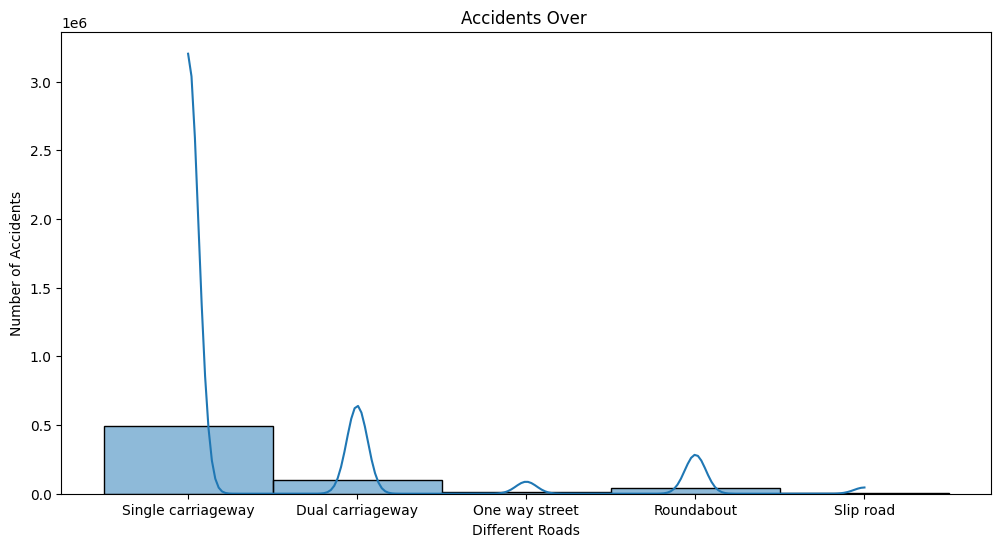

----------------------


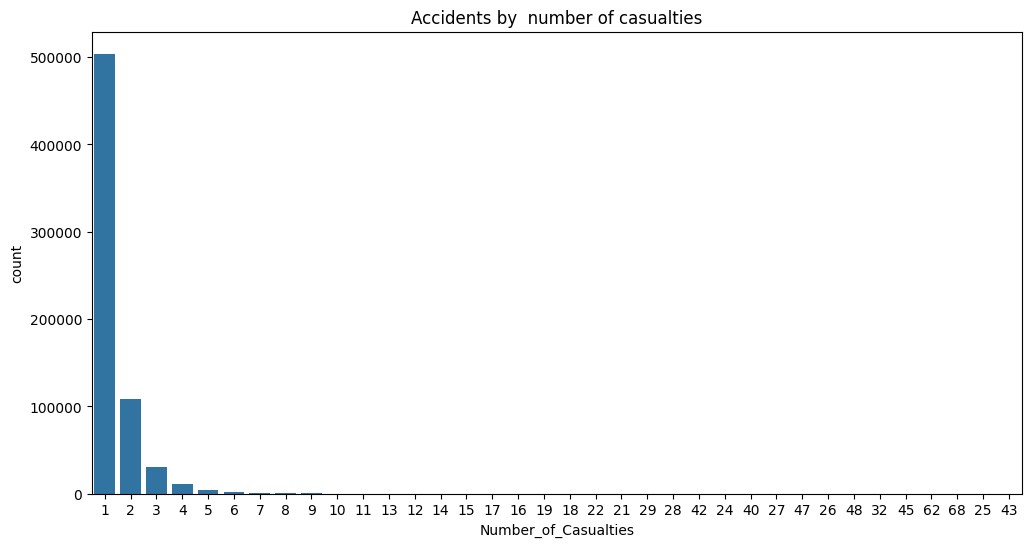

---------------------


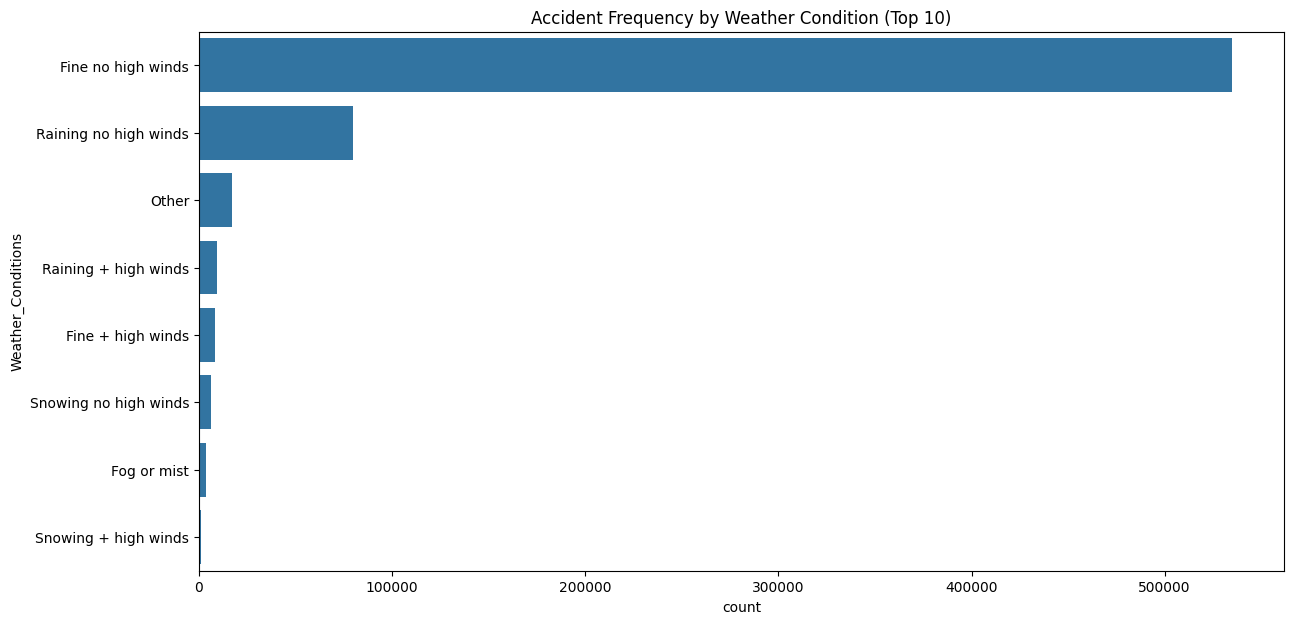

--------------------


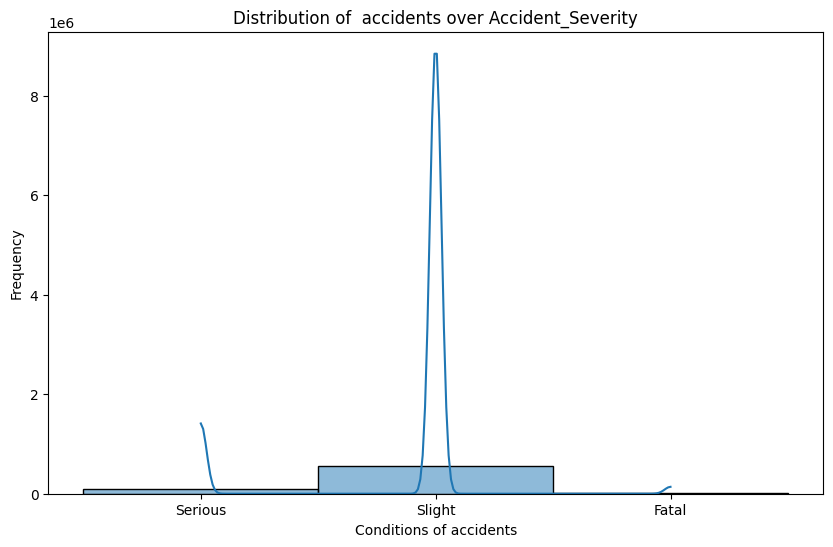

----------------------


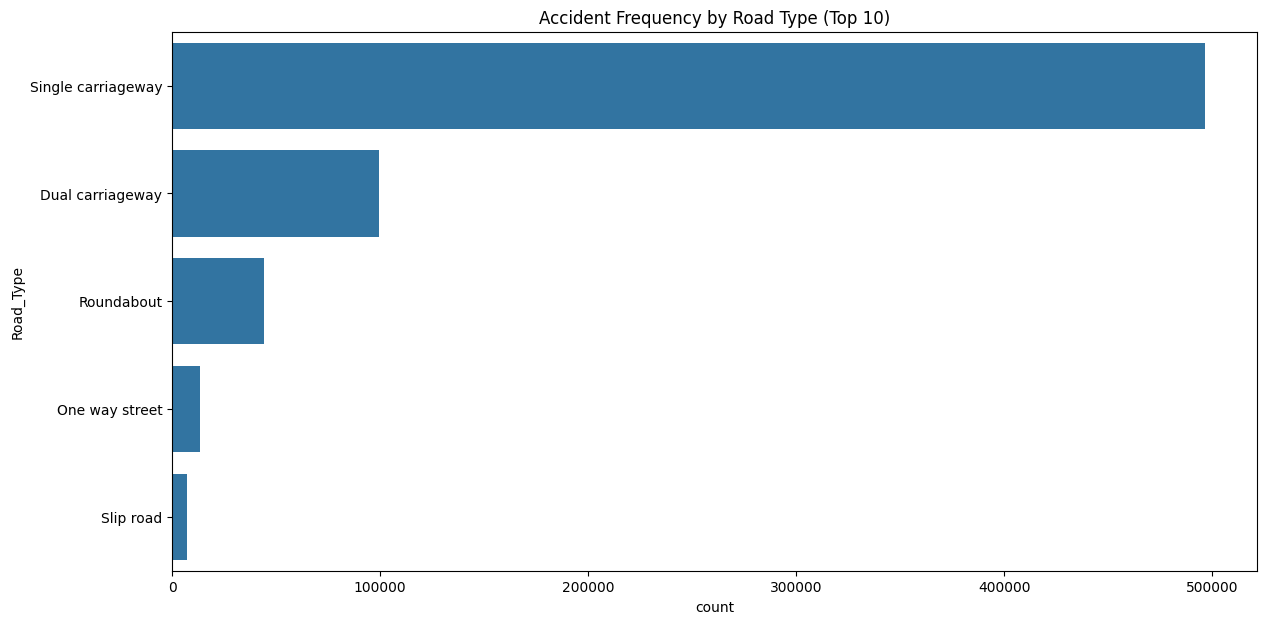

--------------------------


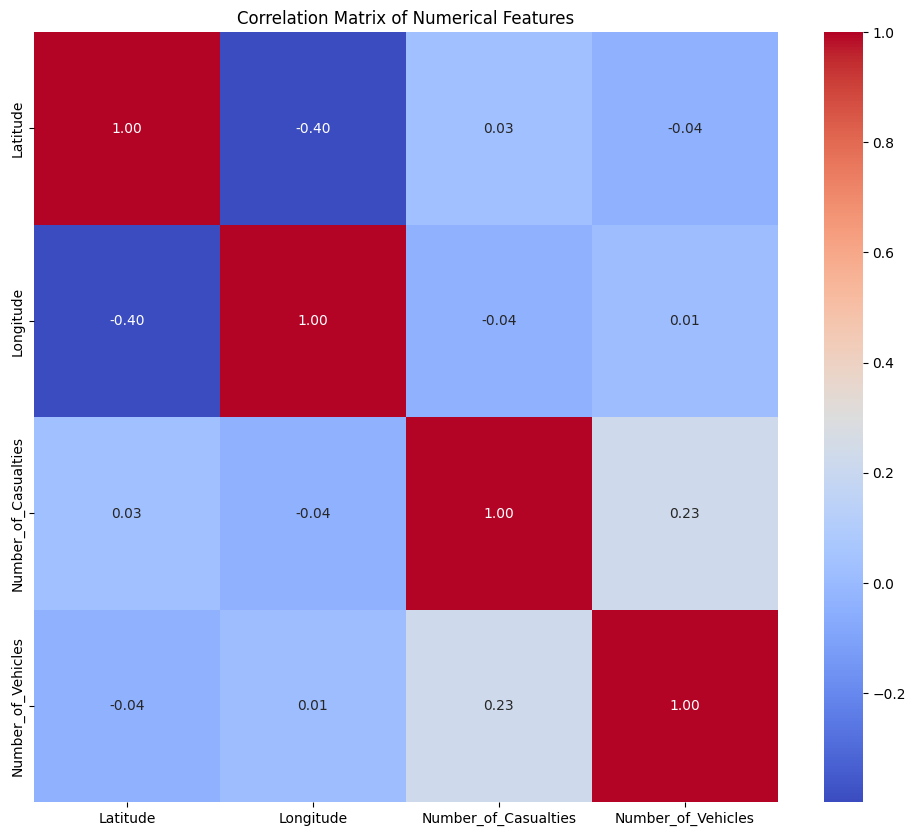

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # For creating interactive maps
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim  # For reverse geocoding (lat/lon to address)

# 1. Load the Data
try:
    df = pd.read_csv('/content/accident data.csv')
except FileNotFoundError:
    print("Error: The file 'accident data.csv' was not found.  Make sure the path is correct.")
    exit()

# 2. Data Cleaning and Preprocessing

# a. Handle Missing Values
print("Missing values:\n", df.isnull().sum())
# Impute or drop as appropriate.  For location data, dropping might be the only reasonable choice if missing.
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)  # Crucial for mapping
df.fillna(df.mode().iloc[0], inplace=True) # fill rest with mode

# 3. Exploratory Data Analysis (EDA) and Visualization
print('Severities over accidents')
print(df['Accident_Severity'].unique())
severity_counts = df['Accident_Severity'].value_counts()
print("\nSeverity Counts:")
print(severity_counts)

print('---------------------------------------')
severity_by_date = df.groupby(['Accident Date', 'Accident_Severity']).size().unstack(fill_value=0)
print("Accident Severity by Date:\n")
print(severity_by_date)

grouped_data = df.groupby(['Road_Type', 'Number_of_Vehicles']).size().unstack(fill_value=0)

print("Accident Counts by Road Type and Number of Vehicles:\n")
print(grouped_data)

# 1.  Road Type Accident Counts
road_type_counts = df['Road_Type'].value_counts()
print("\nAccident Counts by Road Type:\n", road_type_counts)

# 2. Area -wise Accident Counts
vehicle_counts = df['Urban_or_Rural_Area'].value_counts()
print(f"\nAccident Counts by {'Urban_or_Rural_Area'}:\n", vehicle_counts)

print('----------------------------')


# a. Overall Accident Trends
plt.figure(figsize=(12, 6))
sns.histplot(df['Road_Type'], bins=df['Road_Type'].nunique(), kde=True)
plt.title('Accidents Over ')
plt.xlabel('Different Roads')
plt.ylabel('Number of Accidents')
plt.show()

print('----------------------')
plt.figure(figsize=(12, 6))
sns.countplot(x='Number_of_Casualties', data=df, order=df['Number_of_Casualties'].value_counts().index)
plt.title('Accidents by  number of casualties')
plt.show()

print('---------------------')
# b. Weather-Related Analysis
plt.figure(figsize=(14, 7))
sns.countplot(y='Weather_Conditions', data=df, order=df['Weather_Conditions'].value_counts().head(10).index)
plt.title('Accident Frequency by Weather Condition (Top 10)')
plt.show()

print('--------------------')
# c. Accident severity Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Accident_Severity'], bins=50, kde=True)
plt.title('Distribution of  accidents over Accident_Severity')
plt.xlabel('Conditions of accidents')
plt.ylabel('Frequency')
plt.show()

print('----------------------')
# d. Road-Related Analysis
plt.figure(figsize=(14, 7))
sns.countplot(y='Road_Type', data=df, order=df['Road_Type'].value_counts().head(10).index)
plt.title('Accident Frequency by Road Type (Top 10)')
plt.show()

# e. Accident Hotspot Mapping (Using Folium)
# Create a base map (center and zoom level may need adjustment)
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Create a HeatMap layer
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)


# 4. Correlation Analysis (Numerical Features)
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
print('--------------------------')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


